In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("Social_Network_Ads.csv")

In [42]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
329,47,107000,1
247,57,122000,1
93,29,28000,0
19,48,29000,1
319,36,60000,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_tarin, Y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [5]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [12]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of Scaling

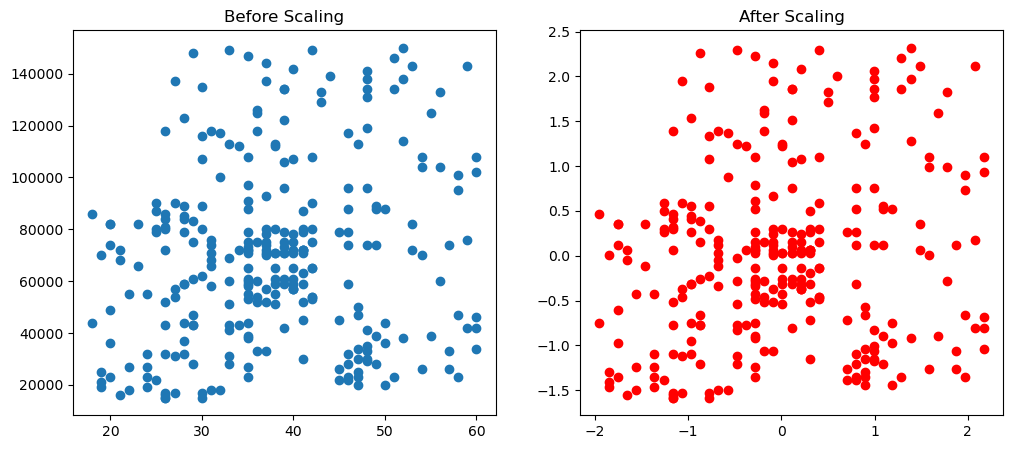

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

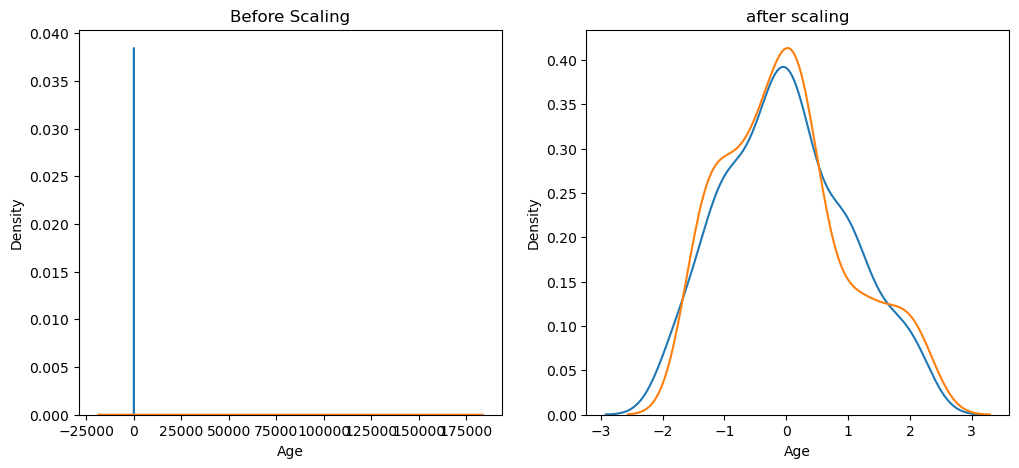

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax2.set_title('after scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

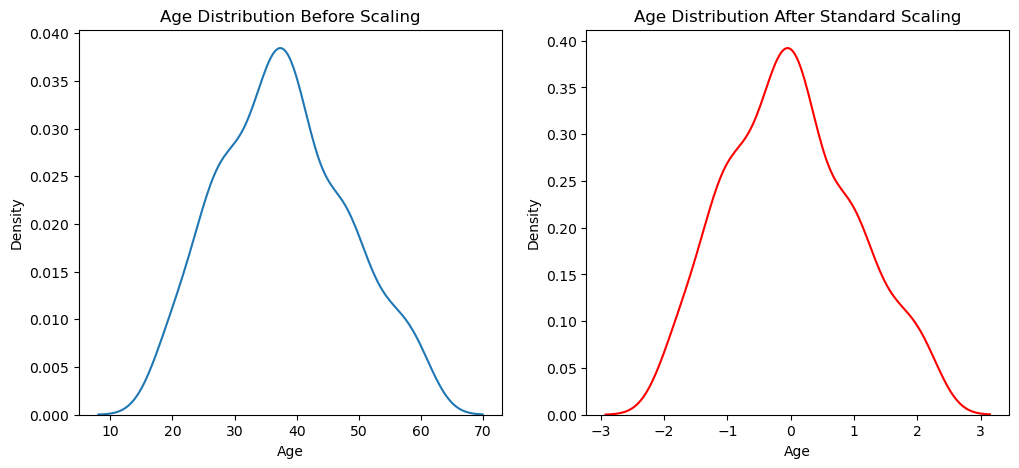

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='red')
plt.show()

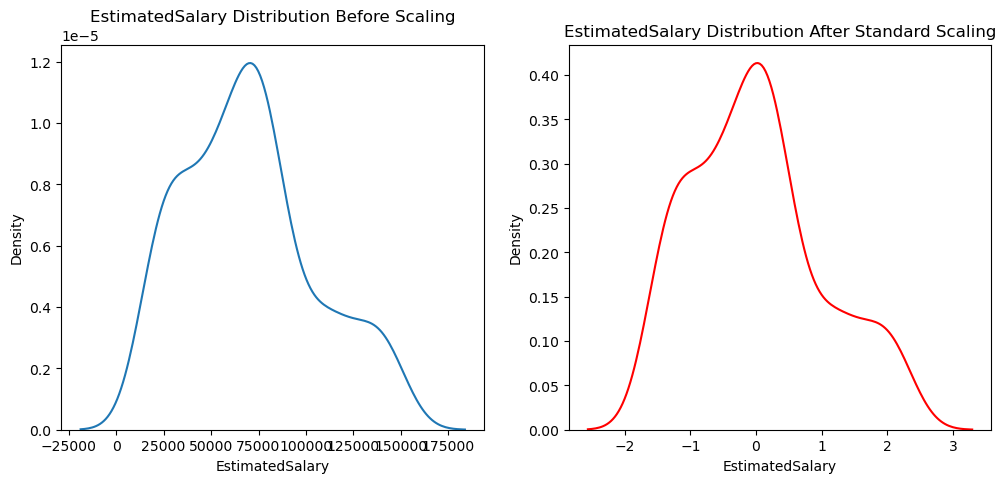

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('EstimatedSalary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='red')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train, Y_tarin)
lr_scaled.fit(X_train_scaled, Y_tarin)

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("Actual score", accuracy_score(Y_test, y_pred))
print("Actual scaled score", accuracy_score(Y_test, y_pred_scaled))

Actual score 0.6583333333333333
Actual scaled score 0.8666666666666667


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [24]:
dt.fit(X_train, Y_tarin)
dt_scaled.fit(X_train_scaled, Y_tarin)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [31]:
print("Actual score", accuracy_score(Y_test, y_pred))
print("Actual scaled score", accuracy_score(Y_test, y_pred_scaled))

Actual score 0.875
Actual scaled score 0.8666666666666667


# effect of outlier

In [40]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}), ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'